## importacion de dependencias

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

## Creacion del dataset

In [2]:
data = {
"Edad": [25, 45, 50, 23, 33, 40, 37, 29],
"Salario": [50000, 100000, 75000, 120000, 45000, 70000,
95000, 80000],
"Compra": ['NO', "SI", "SI", "SI", "NO", "SI", "SI", "NO"]
}

### Creacion el Dataframe

In [3]:
df = pd.DataFrame(data)
df.head()

,Edad,Salario,Compra
0,25,50000,NO
1,45,100000,SI
2,50,75000,SI
3,23,120000,SI
4,33,45000,NO


### Transformar los datos

In [4]:
df['Label'] = df['Compra'].map({"SI": 1, "NO": 0})
df.head()

,Edad,Salario,Compra,Label
0,25,50000,NO,0
1,45,100000,SI,1
2,50,75000,SI,1
3,23,120000,SI,1
4,33,45000,NO,0


Dividir el dt en train y test

In [5]:
from sklearn.model_selection import train_test_split
x = df[["Edad", "Salario"]]
y = df[["Label"]]
x_train, x_test, Y_train, Y_test = train_test_split(x,y,test_size = 0.3, random_state=42)

Creacion del modelo

In [6]:
from sklearn.tree import DecisionTreeClassifier
model =DecisionTreeClassifier()


In [11]:
model.fit(x_train, Y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


### Guardar las predicciones

In [12]:
Y_predict = model.predict(x_test)
Y_predict

array([1, 1, 0])

### Imprimir metricas

In [13]:
from sklearn.metrics import accuracy_score, classification_report

print(f"Precisión: {accuracy_score(Y_test, Y_predict) * 100:.2f}%")
print(classification_report(Y_test, Y_predict))


Precisión: 100.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



### GARFICAR

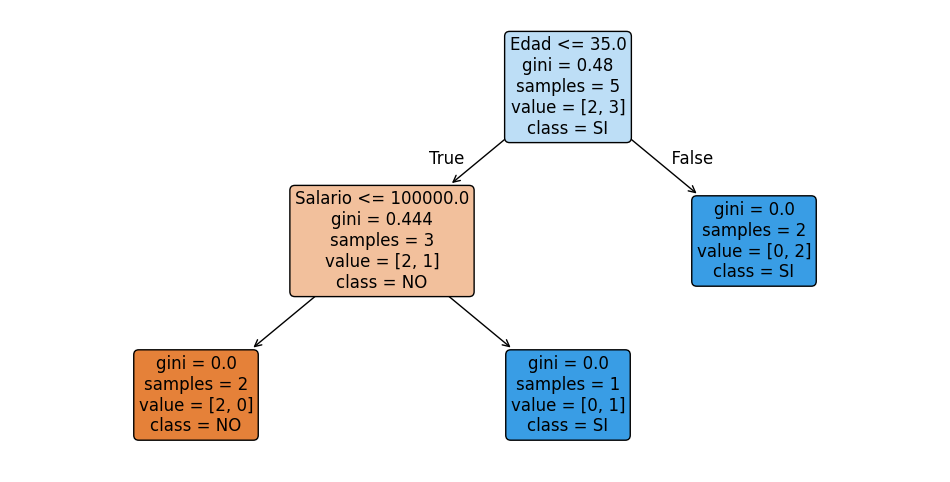

In [14]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,6))
plot_tree(model, feature_names=x.columns, class_names=["NO","SI"],
filled=True, rounded=True, fontsize=12)
plt.show()

In [17]:
import joblib
joblib.dump(model, "arbol.pkl")

['arbol.pkl']